In [1]:
import random

import matplotlib as mpl
import numpy as np
import torch
import torch.utils.data

import theseus as th
import theseus.utils.examples as theg

%load_ext autoreload
%autoreload 2

torch.set_default_dtype(torch.double)

device = "cuda:0" if torch.cuda.is_available else "cpu"
seed = 0
torch.random.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["font.size"] = 16

In [2]:
!pwd

/home/peteryu/SEANRobotGuide/demo


In [25]:
dataset_dir = "/home/peteryu/SEANRobotGuide/data/motion-planning-2d/dataset"
train_dataset = theg.TrajectoryDataset(True, 1000, dataset_dir, val_ratio=0.2, map_type="tarpit", filter_collision_maps=True)
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)

test_dataset = theg.TrajectoryDataset(False, 1000, dataset_dir, val_ratio=0.2, map_type="tarpit", filter_collision_maps=False)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

print(len(train_dl))

batch = next(iter(train_dl))
print(batch.keys())
for k, v in batch.items():
    if k != "file_id":
        print(f"{k:20s}: {v.shape}")
    else:
        print(f"{k:20s}: {v}")

23
dict_keys(['map_tensor', 'sdf_origin', 'cell_size', 'sdf_data', 'expert_trajectory', 'file_id'])
map_tensor          : torch.Size([32, 128, 128])
sdf_origin          : torch.Size([32, 2])
cell_size           : torch.Size([32, 1])
sdf_data            : torch.Size([32, 128, 128])
expert_trajectory   : torch.Size([32, 4, 101])
file_id             : ['tarpit_547', 'tarpit_711', 'tarpit_331', 'tarpit_892', 'tarpit_787', 'tarpit_527', 'tarpit_223', 'tarpit_443', 'tarpit_48', 'tarpit_763', 'tarpit_335', 'tarpit_683', 'tarpit_866', 'tarpit_925', 'tarpit_869', 'tarpit_261', 'tarpit_2', 'tarpit_637', 'tarpit_170', 'tarpit_632', 'tarpit_893', 'tarpit_867', 'tarpit_767', 'tarpit_71', 'tarpit_571', 'tarpit_35', 'tarpit_780', 'tarpit_209', 'tarpit_546', 'tarpit_318', 'tarpit_850', 'tarpit_792']


In [16]:
map_tensor = batch['map_tensor']
map_tensor_1 = map_tensor[0]
sdf_data = batch['sdf_data']
print(sdf_data[0])

tensor([[2.8917, 2.8309, 2.7710,  ..., 5.2034, 5.2623, 5.3217],
        [2.8438, 2.7820, 2.7209,  ..., 5.1521, 5.2116, 5.2716],
        [2.7973, 2.7344, 2.6723,  ..., 5.1015, 5.1616, 5.2221],
        ...,
        [4.8425, 4.8191, 4.7969,  ..., 6.0419, 6.1018, 6.1620],
        [4.9169, 4.8939, 4.8720,  ..., 6.0927, 6.1521, 6.2118],
        [4.9914, 4.9688, 4.9472,  ..., 6.1441, 6.2029, 6.2622]])


/tmp/ipykernel_1409574/390792042.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[0].show()


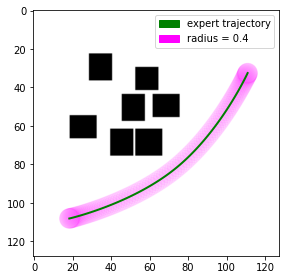

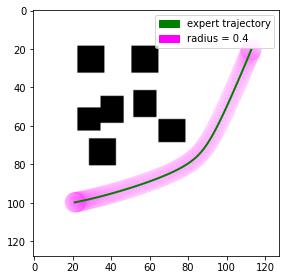

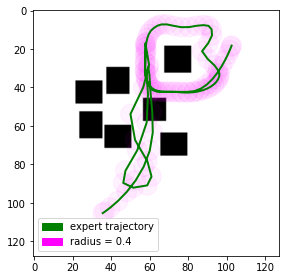

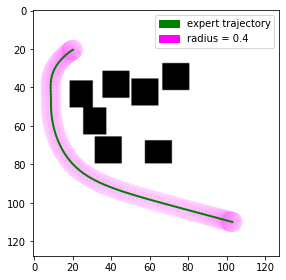

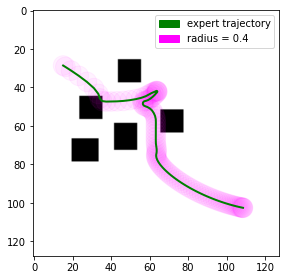

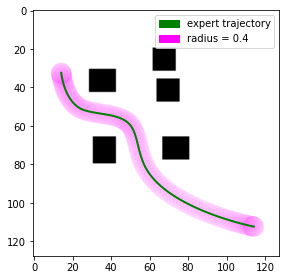

In [21]:
sdf = th.eb.SignedDistanceField2D(
    th.Point2(batch["sdf_origin"]),
    th.Variable(batch["cell_size"]),
    th.Variable(batch["sdf_data"]),
)

i = 0
for batch in train_dl:
    
    sdf = th.eb.SignedDistanceField2D(
        th.Point2(batch["sdf_origin"][0].unsqueeze(0)),
        th.Variable(batch["cell_size"][0].unsqueeze(0)),
        th.Variable(batch["sdf_data"][0].unsqueeze(0)),
    )
    
    figs = theg.generate_trajectory_figs(
        batch["map_tensor"][0].unsqueeze(0), 
        sdf, 
        [batch["expert_trajectory"][0].unsqueeze(0)],
        robot_radius=0.4, 
        labels=["expert trajectory"], 
        fig_idx_robot=0,
        figsize=(10, 4),
    )
    
    figs[0].show()
    
    if i == 5:
        break
    i+=1

In [22]:
# Constant for optimization
# trajectory_len = batch["expert_trajectory"].shape[2]
# num_time_steps = trajectory_len - 1
# map_size = batch["map_tensor"].shape[1]
safety_distance = 0.4
robot_radius = 0.4
total_time = 10.0
# dt_val = total_time / num_time_steps
Qc_inv = [[1.0, 0.0], [0.0, 1.0]]
collision_w = 20.0
boundary_w = 100.0

In [8]:
i = 0
for trial in train_dl:
    for k, v in trial.items():
        if k == "cell_size" or k == "sdf_origin" or k == "file_id":
            print(f"{k:20s}: {v}")
        else: 
            print(f"{k:20s}: {v.shape}")
    print("---------------------")
    if i == 3:
        break
    i+=1

map_tensor          : torch.Size([1, 128, 128])
sdf_origin          : tensor([[-5., -5.]])
cell_size           : tensor([[0.0781]])
sdf_data            : torch.Size([1, 128, 128])
expert_trajectory   : torch.Size([1, 4, 101])
file_id             : ['tarpit_439']
---------------------
map_tensor          : torch.Size([1, 128, 128])
sdf_origin          : tensor([[-5., -5.]])
cell_size           : tensor([[0.0781]])
sdf_data            : torch.Size([1, 128, 128])
expert_trajectory   : torch.Size([1, 4, 101])
file_id             : ['tarpit_621']
---------------------
map_tensor          : torch.Size([1, 128, 128])
sdf_origin          : tensor([[-5., -5.]])
cell_size           : tensor([[0.0781]])
sdf_data            : torch.Size([1, 128, 128])
expert_trajectory   : torch.Size([1, 4, 101])
file_id             : ['tarpit_160']
---------------------
map_tensor          : torch.Size([1, 128, 128])
sdf_origin          : tensor([[-5., -5.]])
cell_size           : tensor([[0.0781]])
sdf_data     

In [9]:
# Check if every trial as the same number of time steps
trial_count = 0
broken_count = 0
for trial in train_dl:
    if trial["expert_trajectory"].size() != (1, 4, 101):
        broken_count += 1
    trial_count += 1

print(trial_count, broken_count)

1000 0


In [34]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, input_dim=1, output_dim=99*2):
        super().__init__()
        
        self.without_start_goal = nn.Sequential(
            nn.Conv2d(input_dim, 128, kernel_size=4, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            
            nn.MaxPool2d(kernel_size=4, stride=3),
            
            nn.Conv2d(128, 64, kernel_size=4, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            
            nn.MaxPool2d(kernel_size=4, stride=3),
            
            nn.Conv2d(64, 32, kernel_size=4, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            
            nn.AvgPool2d(kernel_size=4, stride=3),
        )
        
        self.project_start_and_goal = nn.Sequential(
            nn.Linear(4,8),
            nn.ReLU(inplace=True),
            nn.Linear(8,16),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(16,32),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(32,64),
        )
        
        self.map_weight = 3
        self.middle_dim = 128 + 64
        self.fc1 = nn.Linear(self.middle_dim, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, output_dim)
    
    def forward(self, map_info, start_and_goal, batchsize=32, verbose=False):
        map_info = self.without_start_goal(map_info)
        map_info = (map_info.reshape(batchsize, 1, -1))*self.map_weight
        if verbose:
            print("After first set of conv layers: ", map_info.size())
        
        start_and_goal = self.project_start_and_goal(start_and_goal)
        if verbose:
            print("Projected start and goal:", start_and_goal.size())
        
        output = torch.cat((map_info, start_and_goal), 2)
        if verbose:
            print("Concatenated: ", output.size())
                
        return self.fc2(self.dropout(F.relu(self.fc1(output))))


In [35]:
def prepare_training_data(batch, batchsize=32, include_sdf=False):
    map_tensor = batch["map_tensor"].unsqueeze(1).to(device)
    sdf_tensor = batch["sdf_data"].unsqueeze(1).to(device)
    expert_traj = batch["expert_trajectory"].to(device)
    label_traj = expert_traj[:, :2, 1:-1].reshape(batchsize, 1, -1)
    
    start = expert_traj[:, :2, 0]
    goal = expert_traj[:, :2, -1]
    start_and_goal = torch.cat((start, goal), 1).unsqueeze(1).to(device)
    
    if include_sdf:
        map_tensor = torch.cat((map_tensor, sdf_tensor), 1).double()
    else:
        map_tensor = map_tensor.double()
    
    return map_tensor, start_and_goal, label_traj

def loss_func(feat1, feat2):
    # maximize average magnitude of cosine similarity
    loss = nn.MSELoss()
    return loss(feat1, feat2)

In [36]:
net = CNN(input_dim=1, output_dim=198).to(device)
ex_batch = next(iter(train_dl))
# print(ex_trial["expert_trajectory"])
map_tensor, start_and_goal, label_traj = prepare_training_data(ex_batch, include_sdf=False)
# print(start_and_goal)
# rint(label_traj.size())
out = net(map_tensor, start_and_goal, batchsize=32, verbose=True)
print(out.size())

After first set of conv layers:  torch.Size([32, 1, 128])
Projected start and goal: torch.Size([32, 1, 64])
Concatenated:  torch.Size([32, 1, 192])
torch.Size([32, 1, 198])


In [20]:
from torch.utils.tensorboard import SummaryWriter

In [21]:
from copy import deepcopy

In [37]:
# Training loop
writer = SummaryWriter()

from torch.optim.lr_scheduler import ExponentialLR
include_sdf = False
batchsize = 32

net = CNN(input_dim=1+include_sdf, output_dim=198).to(device)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.005)
scheduler = ExponentialLR(optimizer, gamma=0.9)
net.train()
# epochs = 50

epoch = 1
train_losses, test_losses = [], []
count = 0
best_model = None
early_stopping_val = 50

while True:
    epoch_train_losses, epoch_test_losses = [], []
    net.train()
    for batch in train_dl:
        map_tensor, start_and_goal, label_traj = prepare_training_data(batch, batchsize=batchsize, include_sdf=include_sdf)
        net.zero_grad()
        traj = net(map_tensor, start_and_goal)
        loss = loss_func(traj, label_traj)
        loss.backward()
        optimizer.step()
        epoch_train_losses.append(loss)
        # print(loss)

    net.eval()
    with torch.no_grad():
        for batch in test_dl:
            map_tensor, start_and_goal, label_traj = prepare_training_data(batch, batchsize=batchsize, include_sdf=include_sdf)
            traj = net(map_tensor, start_and_goal)
            loss = loss_func(traj, label_traj)
            epoch_test_losses.append(loss)
    
    train_loss = sum(epoch_train_losses)/len(epoch_train_losses)
    test_loss = sum(epoch_test_losses)/len(epoch_test_losses)
    
    
    if len(test_losses) and test_loss < min(test_losses):
        best_model = deepcopy(net)
        count = 0
    else:
        count +=1
        if count > early_stopping_val:
            print("Early Stopping")
            break
    
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    scheduler.step()
    if epoch % 5 == 0:
        print("Epoch {}, train loss {:.4f}, test loss {:.4f}".format(epoch, train_loss, test_loss))
    
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/test", test_loss, epoch)
    
    epoch += 1
    

Epoch 5, train loss 2.7997, test loss 3.8835
Epoch 10, train loss 2.4033, test loss 3.7920
Epoch 15, train loss 2.3594, test loss 3.6610
Epoch 20, train loss 2.3235, test loss 3.6485
Epoch 25, train loss 2.3204, test loss 3.6585
Epoch 30, train loss 2.2710, test loss 3.6534
Epoch 35, train loss 2.2644, test loss 3.6433
Epoch 40, train loss 2.2747, test loss 3.5569
Epoch 45, train loss 2.2967, test loss 3.6334
Epoch 50, train loss 2.2520, test loss 3.5732
Epoch 55, train loss 2.2307, test loss 3.6462
Epoch 60, train loss 2.3141, test loss 3.6207
Epoch 65, train loss 2.2273, test loss 3.6272
Epoch 70, train loss 2.2176, test loss 3.6021
Epoch 75, train loss 2.2720, test loss 3.6541
Epoch 80, train loss 2.2120, test loss 3.6717
Epoch 85, train loss 2.2019, test loss 3.6742
Epoch 90, train loss 2.2685, test loss 3.6396
Epoch 95, train loss 2.2896, test loss 3.6635
Early Stopping


tensor(2.9201, device='cuda:0')
tensor(2.1619, device='cuda:0')


/tmp/ipykernel_2379819/1447831590.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[0].show()


tensor(2.0854, device='cuda:0')
tensor(2.4330, device='cuda:0')
tensor(2.4018, device='cuda:0')
tensor(9.2718, device='cuda:0')


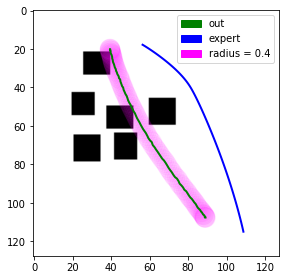

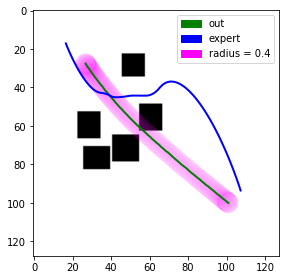

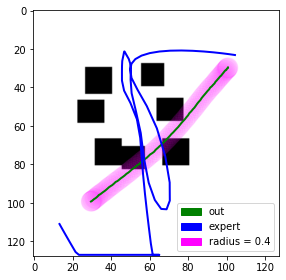

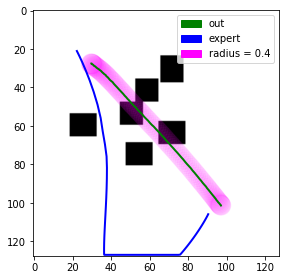

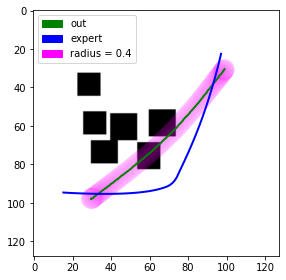

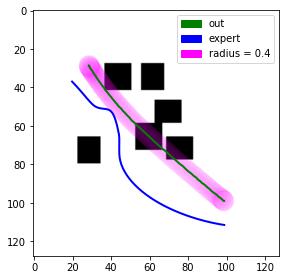

In [38]:
# print out inferred path
net.eval()
i = 1
num_examples = 10
sdf = th.eb.SignedDistanceField2D(
    th.Point2(batch["sdf_origin"]),
    th.Variable(batch["cell_size"]),
    th.Variable(batch["sdf_data"]),
)

for batch in test_dl:
    with torch.no_grad():
        map_tensor, start_and_goal, label_traj = prepare_training_data(batch)
        out = net(map_tensor, start_and_goal)
        print(loss_func(out, label_traj))

        path = out.reshape(32, 2, 99).detach().to("cpu")
        sdf = th.eb.SignedDistanceField2D(
            th.Point2(batch["sdf_origin"][0].unsqueeze(0)),
            th.Variable(batch["cell_size"][0].unsqueeze(0)),
            th.Variable(batch["sdf_data"][0].unsqueeze(0)),
        )

        figs = theg.generate_trajectory_figs(
            batch["map_tensor"][0].unsqueeze(0), 
            sdf, 
            [path[0].unsqueeze(0), batch["expert_trajectory"][0].unsqueeze(0)],
            robot_radius=0.4, 
            labels=["out", "expert"], 
            fig_idx_robot=0,
            figsize=(10, 4),
        )

        figs[0].show()

        if i == num_examples:
            break
        i+=1